In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,10)

# Початкові умови

In [2]:
f1 = np.vectorize(lambda x: 0.8*np.exp(-2*(x-3)**2))
f1_ = np.vectorize(lambda x: 0.2)
f2 = np.vectorize(lambda x: 10-6*x + x**2)
f2_ = np.vectorize(lambda x: 1)
xlim = [1, 5]

x = np.arange(*xlim, 0.01)

### Побудова графіка функції
Аналітичний розв'язок (заданої вище) системи нерівностей $0,8\exp(-2(x-3)^2) \le 0.2; 10-6x+x^2 \ge 1$ показує, що шукана множина Парето лежить в інтервалі $x \in [\sqrt{\ln(2)}+3; 5]$.

In [3]:
plim = [3.833, 5]  # з точністю 0.001
pareto = x[x >= plim[0]]
pareto

array([3.84, 3.85, 3.86, 3.87, 3.88, 3.89, 3.9 , 3.91, 3.92, 3.93, 3.94,
       3.95, 3.96, 3.97, 3.98, 3.99, 4.  , 4.01, 4.02, 4.03, 4.04, 4.05,
       4.06, 4.07, 4.08, 4.09, 4.1 , 4.11, 4.12, 4.13, 4.14, 4.15, 4.16,
       4.17, 4.18, 4.19, 4.2 , 4.21, 4.22, 4.23, 4.24, 4.25, 4.26, 4.27,
       4.28, 4.29, 4.3 , 4.31, 4.32, 4.33, 4.34, 4.35, 4.36, 4.37, 4.38,
       4.39, 4.4 , 4.41, 4.42, 4.43, 4.44, 4.45, 4.46, 4.47, 4.48, 4.49,
       4.5 , 4.51, 4.52, 4.53, 4.54, 4.55, 4.56, 4.57, 4.58, 4.59, 4.6 ,
       4.61, 4.62, 4.63, 4.64, 4.65, 4.66, 4.67, 4.68, 4.69, 4.7 , 4.71,
       4.72, 4.73, 4.74, 4.75, 4.76, 4.77, 4.78, 4.79, 4.8 , 4.81, 4.82,
       4.83, 4.84, 4.85, 4.86, 4.87, 4.88, 4.89, 4.9 , 4.91, 4.92, 4.93,
       4.94, 4.95, 4.96, 4.97, 4.98, 4.99])

На графіку функції це має наступний вигляд:

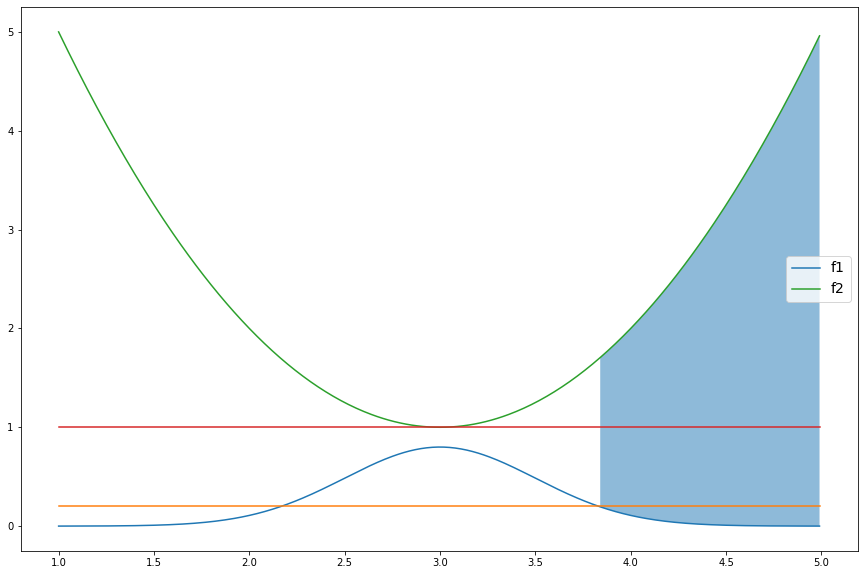

In [4]:
fig, ax = plt.subplots()

ax.plot(x, f1(x), label='f1')
ax.plot(x, f1_(x))
ax.plot(x, f2(x), label='f2')
ax.plot(x, f2_(x))

plt.fill_between(pareto, f1(pareto), f2(pareto), alpha=0.5)

plt.legend(prop={'size': 14})
plt.show()

In [ ]:
fig.savefig('pareto.png', dpi=1200)

# Метод технічних обмежень

При заданих точності e = 0.0001 та кроку сітки s = 0.001

In [5]:
e = 4  # знаків після коми
s = 1e-3

x = np.arange(*plim, s)
f1_t = np.vectorize(lambda x: round(f1(x)/f1_(x), e))
f2_t = np.vectorize(lambda x: round(f2(x)/f2_(x), e))

Нижче описані дві процедури технічних обмежень: максимінна та мінімаксна оптимізація на множині Парето. \\
Максимінна:
$$
F_1(x) = \min_{i \in [1, m]} \dfrac{f_i(x)}{f_i^*} \\
F_1(x^0) = \max_{x \in D} F_1(x)
$$
І аналогічно мінімаксна:
$$
F_2(x) = \max_{i \in [1, m]} \dfrac{f_i(x)}{f_i^*} \\
F_2(x^0) = \min_{x \in D} F_2(x)
$$

In [6]:
def maxmin(*f_result):
  stacked = np.column_stack(f_result)
  min_ = np.amin(stacked, axis=1)
  return np.amax(min_), np.argmax(min_), stacked, min_


def minmax(*f_result):
  stacked = np.column_stack(f_result)
  max_ = np.amax(stacked, axis=1)
  return np.amin(max_), np.argmin(max_), stacked, max_

In [7]:
results = [f1_t(x), f2_t(x)]
maxmin_r, maxmin_idx, *maxmin_cl = maxmin(*results)
print(f'Maxmin result: {maxmin_r}')

Maxmin result: 0.9985


In [8]:
minmax_r, minmax_idx, *minmax_cl = minmax(*results)
print(f'Minmax result: {minmax_r}')

Minmax result: 1.6939


Для наглядності побудуємо таблицю

In [9]:
filler = pd.Series('-', index=range(len(x)))
data = {
    'x': x, 
    'f1/f1*': minmax_cl[0][:, 0],
    'f2/f2*': minmax_cl[0][:, 1],
    'max(f/f*)': minmax_cl[1],
    'min max(f/f*)': filler.copy(),
    'min(f/f*)': maxmin_cl[1],
    'max min(f/f*)': filler.copy()
}

df = pd.DataFrame(data)
df.loc[minmax_idx, 'min max(f/f*)'] = minmax_r
df.loc[maxmin_idx, 'max min(f/f*)'] = maxmin_r

df.head()

,x,f1/f1*,f2/f2*,max(f/f*),min max(f/f*),min(f/f*),max min(f/f*)
0,3.833,0.9985,1.6939,1.6939,1.6939,0.9985,0.9985
1,3.834,0.9952,1.6956,1.6956,-,0.9952,-
2,3.835,0.9919,1.6972,1.6972,-,0.9919,-
3,3.836,0.9886,1.6989,1.6989,-,0.9886,-
4,3.837,0.9853,1.7006,1.7006,-,0.9853,-


Як і очікувалось з графіка, для двох досліджуваних функцій раціональним компромісом слід обрати стратегію x=3.833

In [ ]:
!pip install dataframe_image

In [11]:
# [Google Colab only] fix OSError: Chrome executable not able to be found on your machine
# https://github.com/dexplo/dataframe_image/issues/15
!wget -q https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb -O google-chrome-stable_current_amd64.deb 
!apt-get install -y -qq ./google-chrome-stable_current_amd64.deb

In [12]:
import dataframe_image as dfi

df_styled = df.head(10).style.background_gradient(subset=['max(f/f*)', 'min(f/f*)'])
dfi.export(df_styled,"pareto_table.png")